# Randomized Eigenvalue Solver

In [1]:
import os
import sys
import numpy as np
import scipy.linalg as scila
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.dirname(os.getcwd()))

from mhu_helper_functions.randomized_eig import reigsh

In [2]:
np.random.seed(0)
n = 1000
k = 70 
p = 5
A = np.random.randn(n,n)
u, _, _ = np.linalg.svd(A)
d = np.power(0.95, np.arange(n)) * 100
A = u @ np.diag(d) @ u.T
B = np.eye(n)

In [3]:
evals_single, evecs_single = reigsh(A, k, p, single_pass=True)
evals_double, evecs_double = reigsh(A, k, p, single_pass=False)

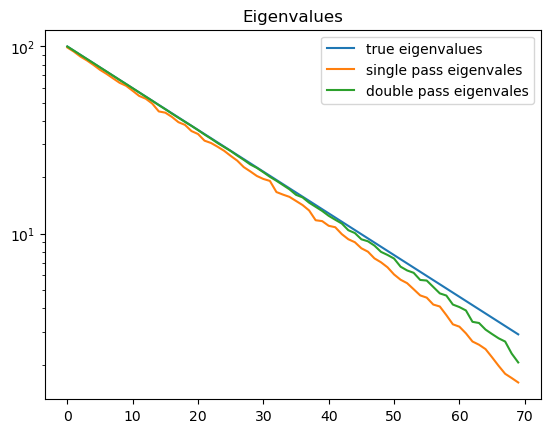

In [4]:
plt.figure()
plt.semilogy(d[:k], label="true eigenvalues")
plt.semilogy(evals_single, label="single pass eigenvales")
plt.semilogy(evals_double, label="double pass eigenvales")
plt.title("Eigenvalues")
plt.legend()
plt.show()

In [5]:
A_single = evecs_single @ np.diag(evals_single) @ evecs_single.T
A_double = evecs_double @ np.diag(evals_double) @ evecs_double.T

In [6]:
w, v = scila.eigh(A + B, B)
w, v = w[::-1], v[:, ::-1]
ws, vs = scila.eigh(A + B, A_single + B)
ws, vs = ws[::-1], vs[:, ::-1]
wd, vd = scila.eigh(A + B, A_double + B)
wd, vd = wd[::-1], vd[:, ::-1]

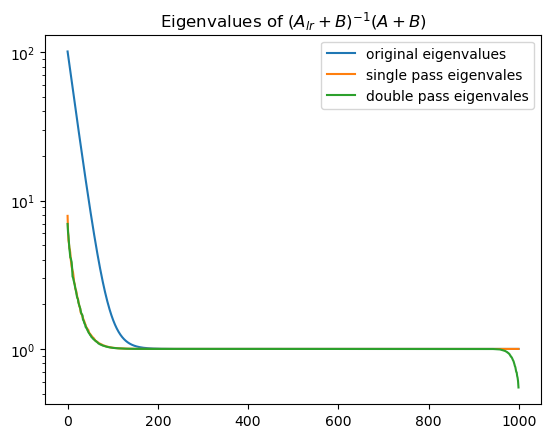

In [7]:
plt.figure()
plt.semilogy(w, label="original eigenvalues")
plt.semilogy(ws, label="single pass eigenvales")
plt.semilogy(wd, label="double pass eigenvales")
plt.title(r"Eigenvalues of $(A_{lr}+B)^{-1}(A+B)$")
plt.legend()
plt.show()

In [8]:
# Single pass algorithm doesn't create tails.
print(ws[-5:])
print(wd[-5:])

[1. 1. 1. 1. 1.]
[0.69541342 0.65814162 0.63983407 0.60765546 0.54986046]
